<p style="font-family: Arial; font-size:2.5em;color:green; font-style:bold"><br>
Employee Attrition
</p><br>

We will analyze a dataset of employees to gain insights on employee attrition. You may refer to the Word document for data description and variable definitions.

In [29]:
# Import packages: pandas, matplotlib, seaborn, statsmodels, etc. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Read in the dataset
emp_df = pd.read_csv('Datasets/Employee_Attrition.csv')

In [3]:
# Check basic information using .info(), .columns and .head()
emp_df.info()

emp_df.head()

emp_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

1. Understand the dataset. There are 35 variables. To better understand them, we can conceptually organize them into different categories. Use the Word document, categorize the variable names to their corresponding categories and write them in the cell below. I wrote one as an example. <br>
After this exercise, you will have a clear picture of the variables and what they measure.

In [4]:
# Identifier
  # 'EmployeeNumber'
    
# Attrition
  # 'Attrition'
    
# Employee demographics
  # 'Age', 'Education', 'EducationField', 'Gender', 'MaritalStatus'
    
# Job-related
  # 'BusinessTravel', 'Department','JobInvolvement', 'JobLevel', 'JobRole'
  # 'JobSatisfaction','OverTime'

# Work environment
  # 'DistanceFromHome', 'EnvironmentSatisfaction', 'RelationshipSatisfaction','WorkLifeBalance'
    
# Compensation
 # 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate','PercentSalaryHike', 
 #  'StockOptionLevel'

# Performance
 # 'PerformanceRating'

# Job history
 # 'TotalWorkingYears', 'TrainingTimesLastYear', 'NumCompaniesWorked'
 # 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'

# Variables with constant values for the whole dataset
 # 'EmployeeCount', 'Over18', 'StandardHours'

2. For the purpose of building a model to predict attrition, which variable is the target variable? Explore this variable distribution. How many employees have left the company?

The target variable is going to be ['Attrition']. I will use matplotlib to visualize the current level of attrition.

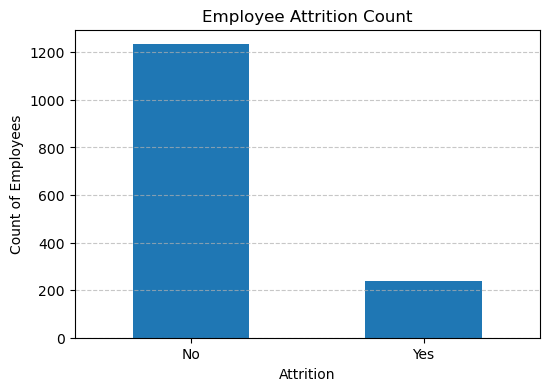

In [5]:
attrition_counts = emp_df['Attrition'].value_counts()

plt.figure(figsize=(6, 4))
attrition_counts.plot(kind='bar')

plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count of Employees')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

3. Let's start to prepare the data for analysis. First, we can drop the following variables: the identifier and variables with constant values. They do not contribute any information to the analysis.

In [6]:
attrition = emp_df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

4. We may expect the variables of compensation may be correlated with each other. For instance, montly income and monthly rate should be correlated. Please explore the correlation between them using both numbers and a graph. Do the same for 'DailyRate', 'HourlyRate' and 'MonthlyRate'. What do you find? 

In [7]:
# Check correlation between MonthlyIncome and MonthlyRate
print(attrition[['MonthlyIncome', 'MonthlyRate']].corr())

# Check correlation among DailyRate, HourlyRate, and MonthlyRate
print(attrition[['DailyRate', 'HourlyRate', 'MonthlyRate']].corr())

               MonthlyIncome  MonthlyRate
MonthlyIncome       1.000000     0.034814
MonthlyRate         0.034814     1.000000
             DailyRate  HourlyRate  MonthlyRate
DailyRate     1.000000    0.023381    -0.032182
HourlyRate    0.023381    1.000000    -0.015297
MonthlyRate  -0.032182   -0.015297     1.000000


The correlation shows that compensation variables such as MonthlyIncome, MonthlyRate, DailyRate, and HourlyRate are not strongly correlated with one another. The correlation coefficients are all very close to zero, indicating little to no linear relationship. This suggests that these variables were likely generated independently, that is, variables such as 'MonthlyRate' and 'MonthlyIncome' are not calculated the same and should be analyzed separately rather than assumed to be related.

5. Make histograms for all the compensation variables. What do you find?

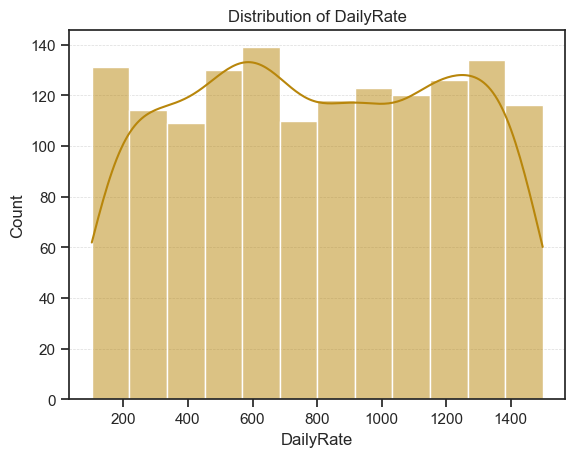

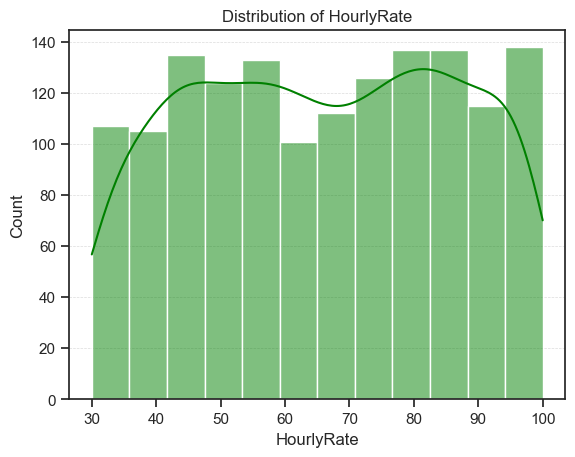

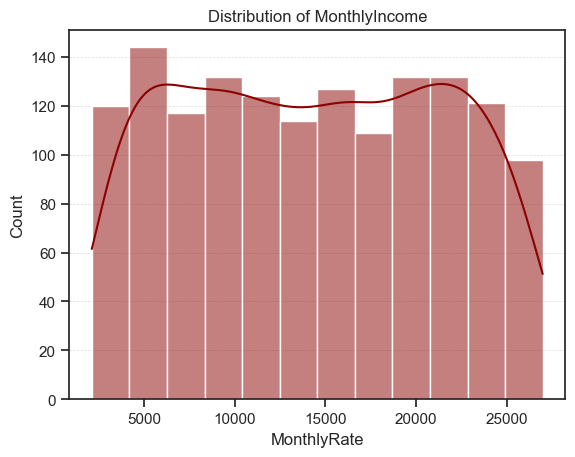

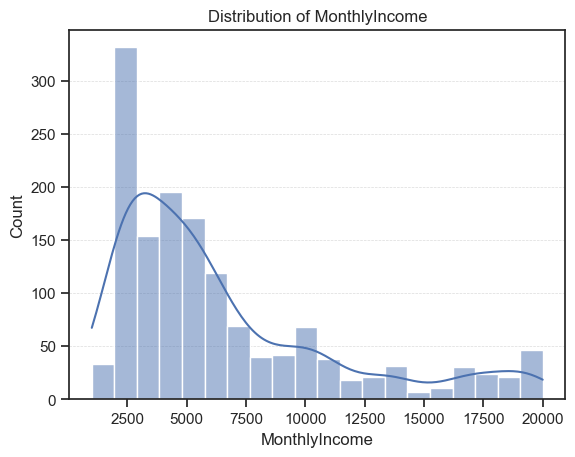

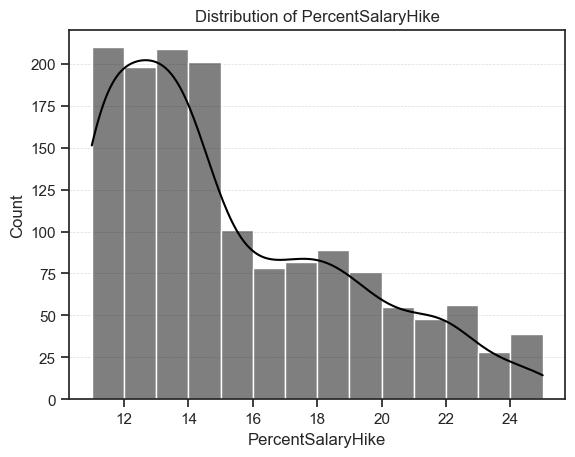

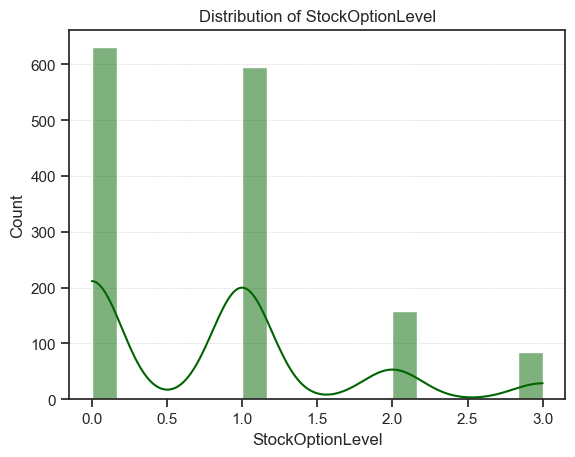

In [8]:
plt.figure()
sns.set_theme(style='ticks')

# Hist of 'DailyRate'
sns.histplot(emp_df['DailyRate'], color='darkgoldenrod', kde=True)
plt.title('Distribution of DailyRate')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Hist of 'HourlyRate'
plt.figure()
sns.histplot(emp_df['HourlyRate'], color='green', kde=True)
plt.title('Distribution of HourlyRate')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Hist of 'MonthlyRate'
plt.figure()
sns.histplot(emp_df['MonthlyRate'], kde=True, color='darkred')
plt.title('Distribution of MonthlyIncome')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Hist of 'MonthlyIncome'
plt.figure()
sns.histplot(emp_df['MonthlyIncome'], kde=True)
plt.title('Distribution of MonthlyIncome')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Hist of 'PercentSalaryHike'
plt.figure()
sns.histplot(emp_df['PercentSalaryHike'], color='black', kde=True)
plt.title('Distribution of PercentSalaryHike')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Hist of 'StockOptionLevel'
plt.figure()
sns.histplot(emp_df['StockOptionLevel'], color='darkgreen', kde=True)
plt.title('Distribution of StockOptionLevel')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7);

From the histogram graphing 'DailyRate', 'HourlyRate', and 'MonthlyRate' we can infer that employees are paid across the full spectrum of daily rates and hourly rates mostly uniformly.

From the histogram depicting 'MonthlyIncome', we can see that the distribution is right skewed. Most of the employe's monthly income is on the lower end between $2000 and $6000, with most making around $2500 in monthly income.

The histogram depicting 'PercentSalaryHike' is also right-skewed, indicating that most employee recieve salary hikes between 11% and 15%.

The histogram depicting 'StockOptionLevel' indicates that most employees are either not recieveing any stock options or are recieving the lowest level. If stock option levels are based on tenure, this indicates that most employees are not tenured enough to recieve higher stock options fromt he company.

The distribution of 'MonthlyIncome', 'PercentSalaryHike' and 'StockOptionLevel' seem to follow a skewed normal distribution that fit our common sense, but the rate variable distributions do not seem so. So, we decide to drop the rate variables.

In [9]:
attrition.drop(columns=['DailyRate', 'HourlyRate', 'MonthlyRate'], inplace=True)
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

6. Make a graph to examine the relationship between 'Attrition' and 'MonthlyIncome'. What do you find?

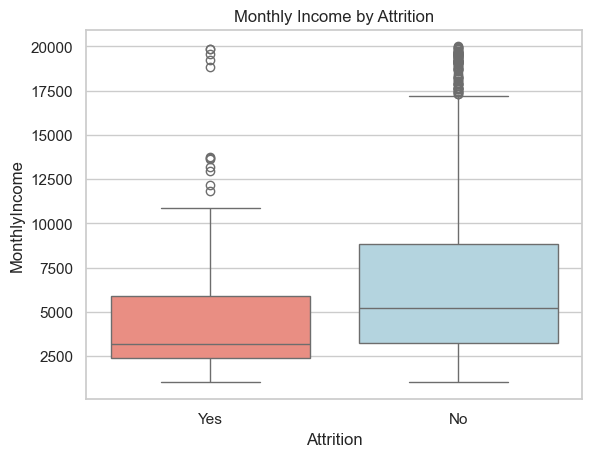

In [10]:
plt.figure()
sns.set_theme(style='whitegrid')

# Boxplot comparing monthly income and attrition
sns.set_style
sns.boxplot(x=attrition['Attrition'], y=attrition['MonthlyIncome'], hue=attrition['Attrition'], palette={'Yes': 'salmon', 'No': 'lightblue'})
plt.title('Monthly Income by Attrition');

The boxplot comparing 'MonthlyIncome' by 'Attrition' indicates that employees who attrited generally had lower monthly incomes compared to those who stayed. The median income for employees who left is noticeably lower around $2,500, and there are fewer high-income earners in that group. In contrast, employees who remained tend to have higher incomes with a wider distribution and more high-income outliers. This suggests that lower compensation may be associated with a higher likelihood of attrition.

Based on the exploration of Step 4, 5, and 6. We may decide that to include only 'MonthlyIncome', 'PercentSalaryHike', and 'StockOptionLevel' in the model. (The correlation analysis is not consistent with our common sense, which may indicate that the rate variables may have problems. So, we decide not to use them.)

7. Let's move to explore demographic variables, using the education variables as an example. I made a graph to examine their combined distribution, which can represent the pivot table of the two variables. From the graph, you may find that most employees are in the fields of life sciences and medical. Bachelor's degrees are the most across fields.<br>
<br>
<I>Now you may pick one variable in demographics to explore its relationship with Attrition. For categorical variables, you may use the countplot as in my example to display.</I>

In [11]:
pd.pivot_table(data = attrition, index = 'Education', columns = 'EducationField',
               values = 'Attrition', aggfunc = 'count')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Education,,,,,,
1,2,67,14,63,5,19
2,2,116,24,99,19,22
3,16,233,59,183,24,57
4,5,173,52,104,33,31
5,2,17,10,15,1,3


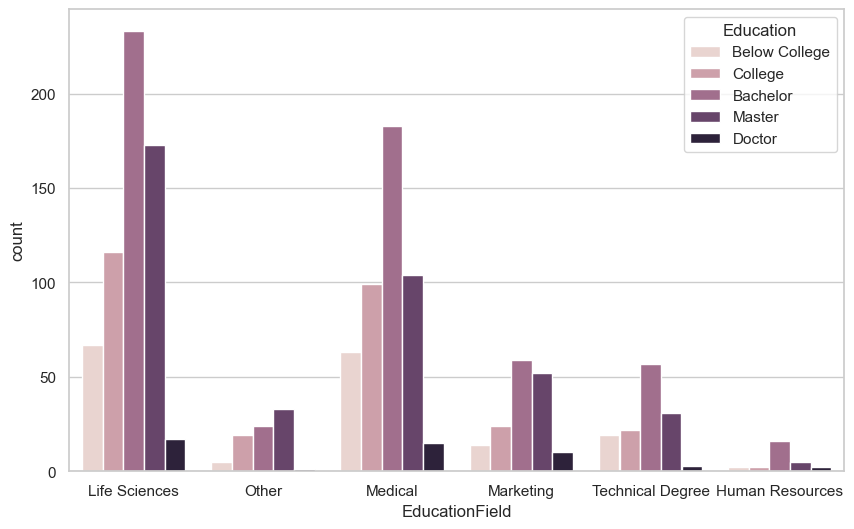

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data = attrition, x = 'EducationField', hue = 'Education')
ax.legend(title='Education', labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor']);

In [13]:
pd.pivot_table(data = attrition, index = 'MaritalStatus', columns = 'Gender',
               values = 'Attrition', aggfunc = 'count')

Gender,Female,Male
MaritalStatus,,
Divorced,117,210
Married,272,401
Single,199,271


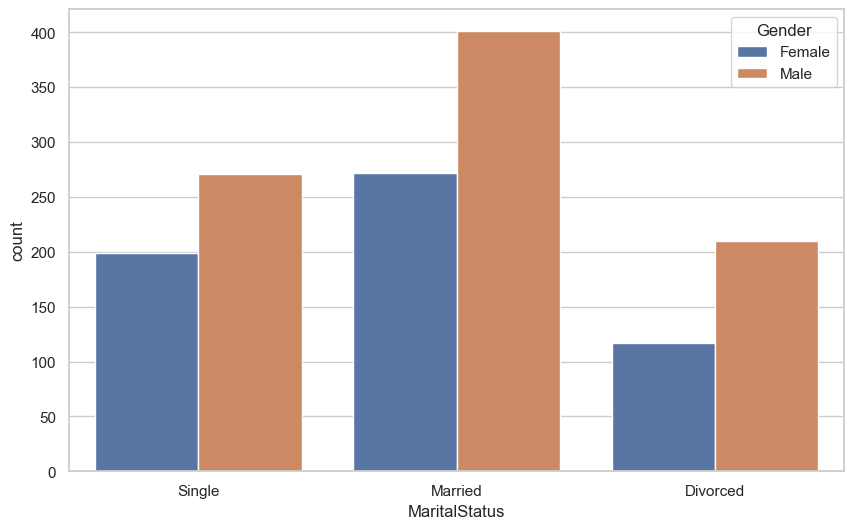

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data = attrition, x = 'MaritalStatus', hue = 'Gender')
ax.legend(title='Gender', labels=['Female', 'Male']);

8. Next is to the category of 'Job related'. Examine 'JobRole' with two graphs: its distrition and relationship with Attrition. What do you find? Which roles are more likely to leave?

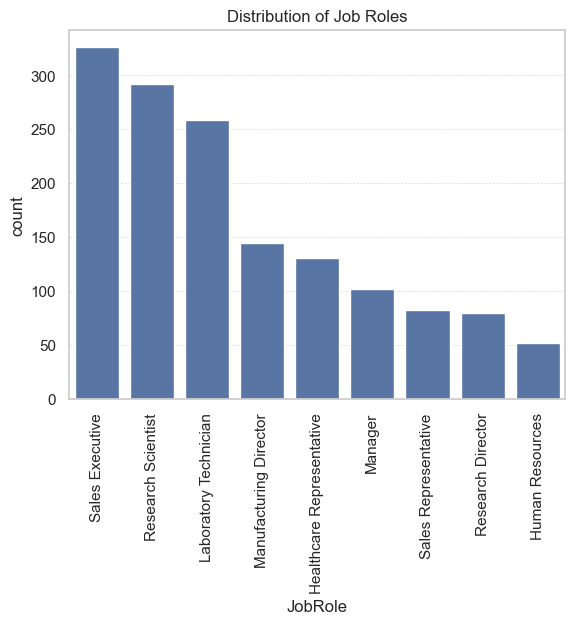

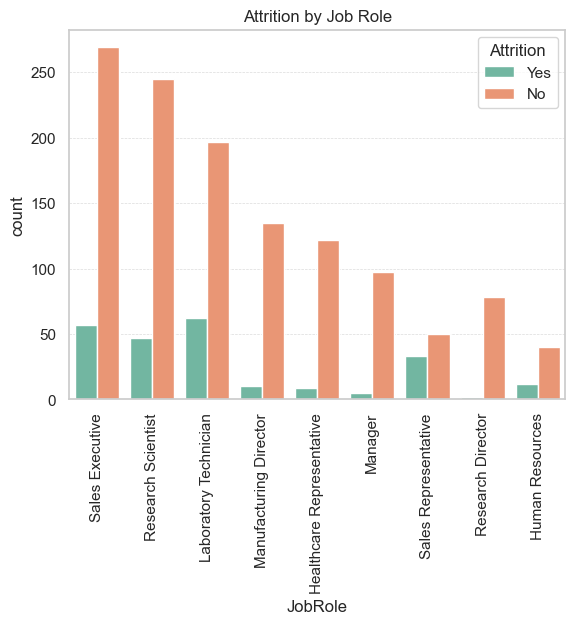

In [15]:
# Distribution of Job Roles
plt.figure()

sns.countplot(x=attrition['JobRole'], order=attrition['JobRole'].value_counts().index)
plt.title('Distribution of Job Roles')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Job role vs Attrition
plt.figure()

sns.countplot(x=attrition['JobRole'], data=attrition, hue='Attrition', order=attrition['JobRole'].value_counts().index, palette='Set2')
plt.title('Attrition by Job Role')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7);


The graph comparing Job Role vs Attrition shows that Sales Representatives and Laboratory Technicians are more likely to leave the company compared to other roles, while Managers and Healthcare Representatives have the lowest attrition levels.

I did the same for every job related variables. I intended to explore whether these variables play a role and the results will guide the model building later. The conclusion is that all these variables seem to be relevant to attrition outcome.

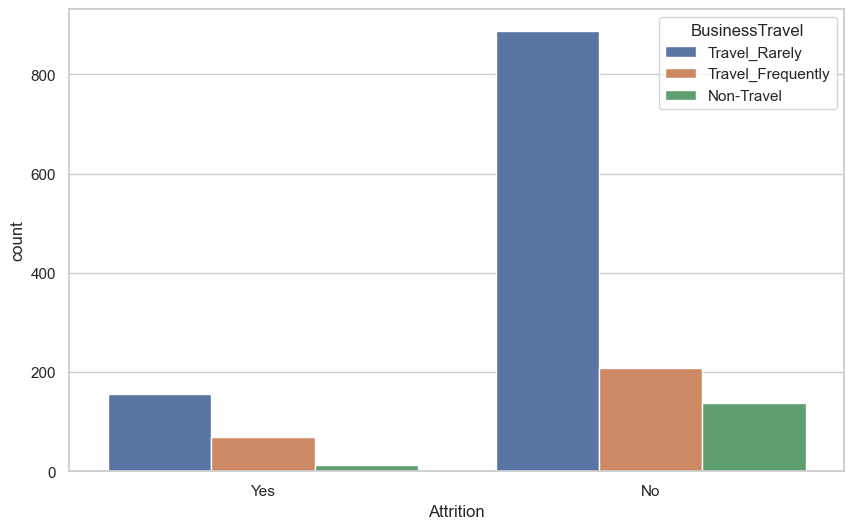

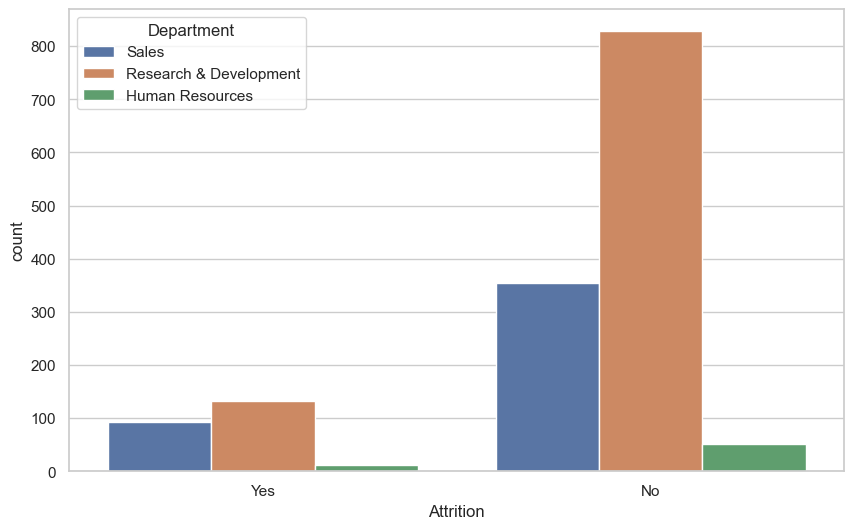

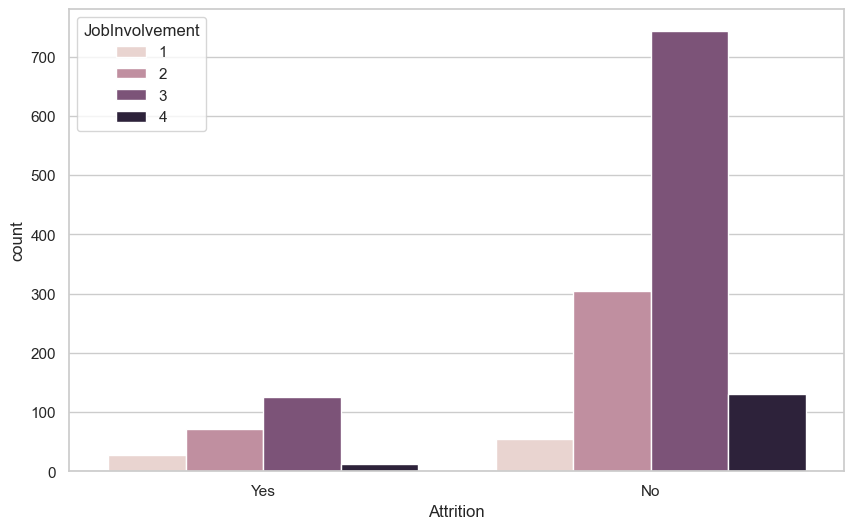

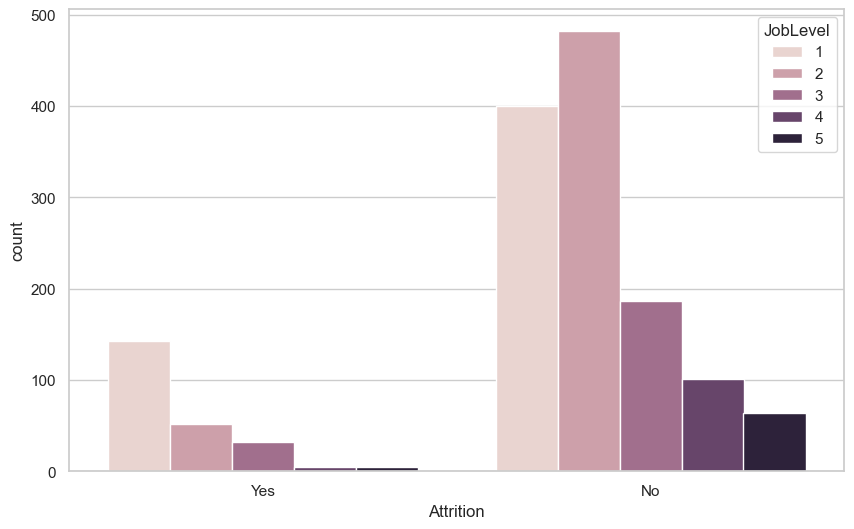

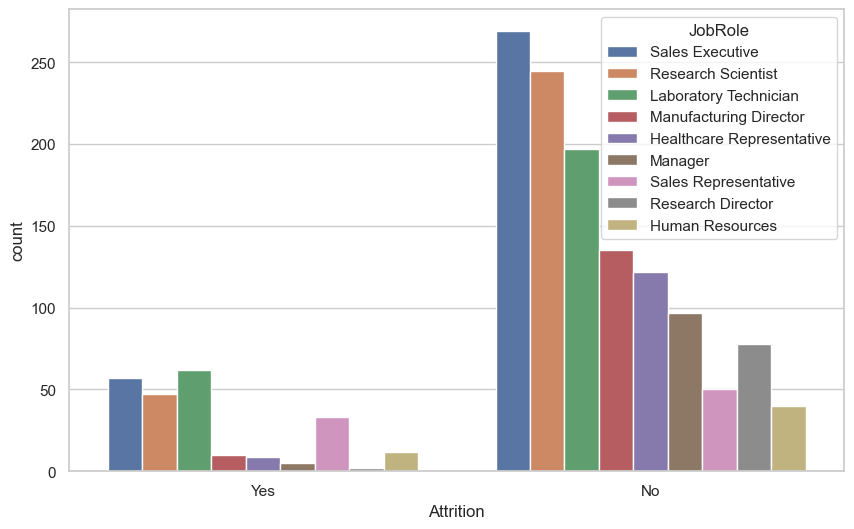

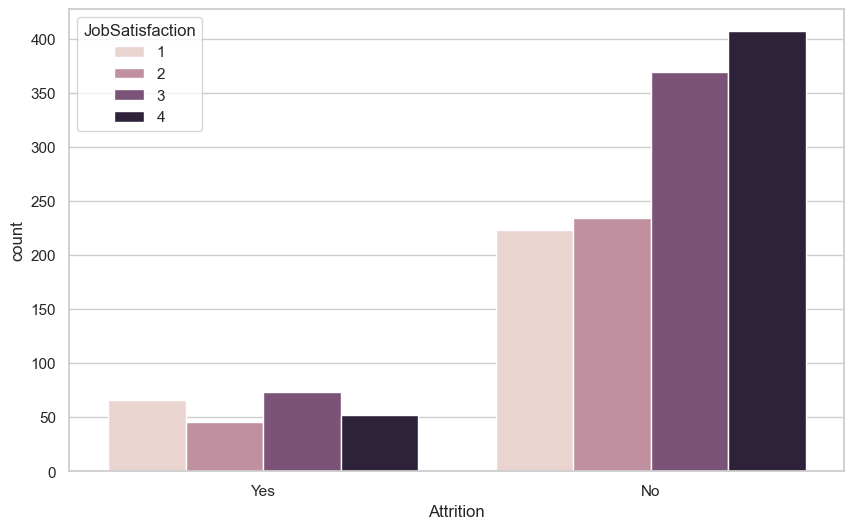

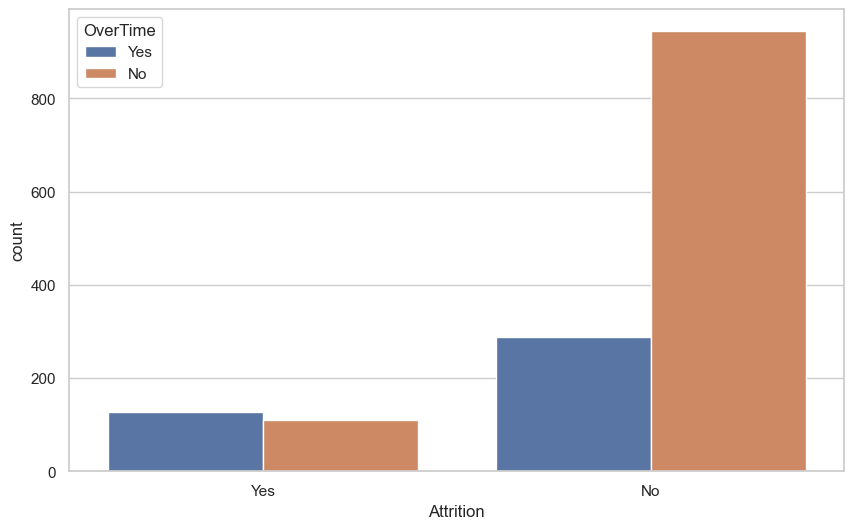

In [16]:
for var in ['BusinessTravel', 'Department','JobInvolvement', 'JobLevel', 'JobRole',
  'JobSatisfaction','OverTime']:
   # if attrition[var].dtype == 'int64':
    #    plt.figure(figsize=(10, 6))
     #   sns.boxplot(data = attrition, x = 'Attrition', y = var)
      #  plt.show()
    #else:
        plt.figure(figsize=(10, 6))
        sns.countplot(data = attrition, x = 'Attrition', hue = var)
        plt.show()

# More likely to leave:
  # Frequent traveler
  # Sales department
  # Low job involvement
  # Level 1 jobs
  # Sales related roles
  # low job satisfaction
  # More overtime

9. Let's move to work environment features. Similarly, pick one variable to examine its distritbution and relationship with attrition. Report your findings.

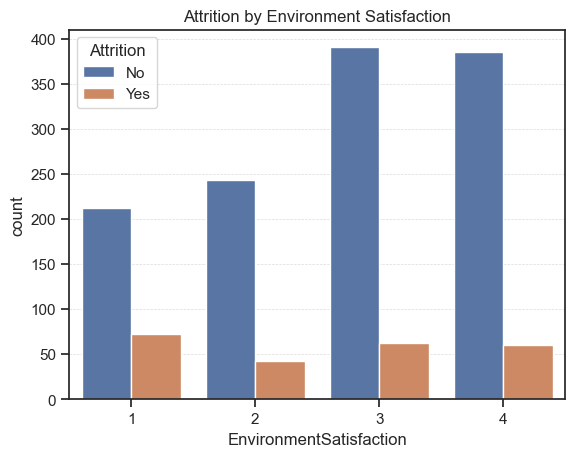

In [17]:
# Attrition vs environment satisfaction
plt.figure()
sns.set_style('ticks')

sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=attrition)
plt.title('Attrition by Environment Satisfaction')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7);

The graph shows a clear pattern between environment satisfaction and attrition. Employees with lower satisfaction ratings (1 and 2) have higher a higher attrition ratio compared to those with higher satisfaction levels. In contrast, employees who rated their environment satisfaction as 3 or 4 are more likely to stay, suggesting that improving the work environment may play a key role in reducing employee turnover.

I explored all these variables and decided that we will include them in the model.

10. The last group of variables is about work history. 

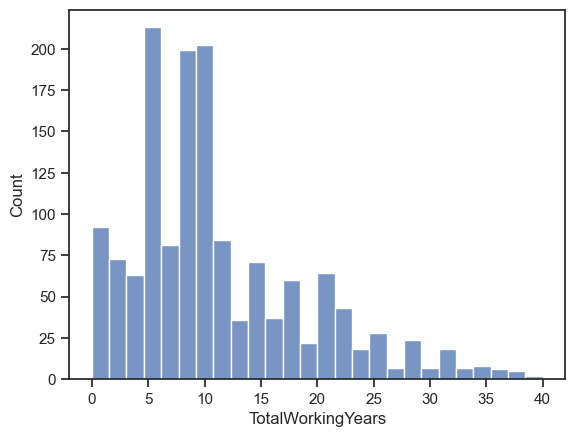

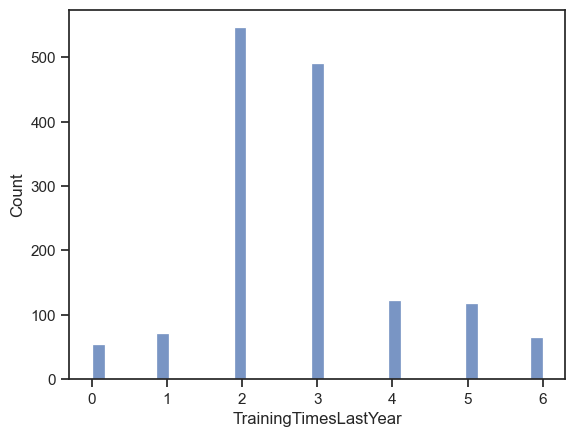

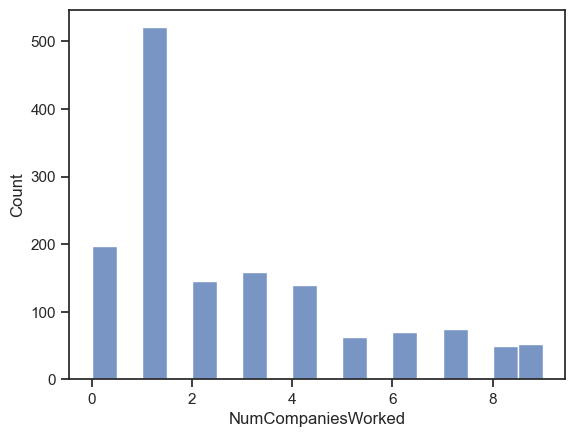

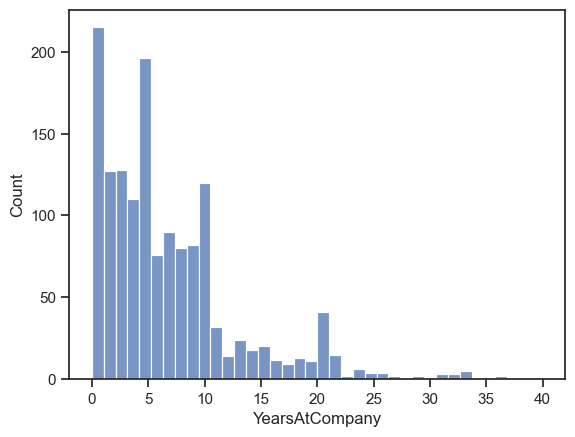

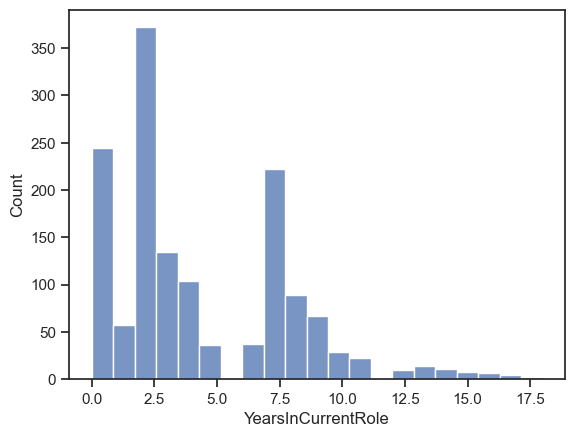

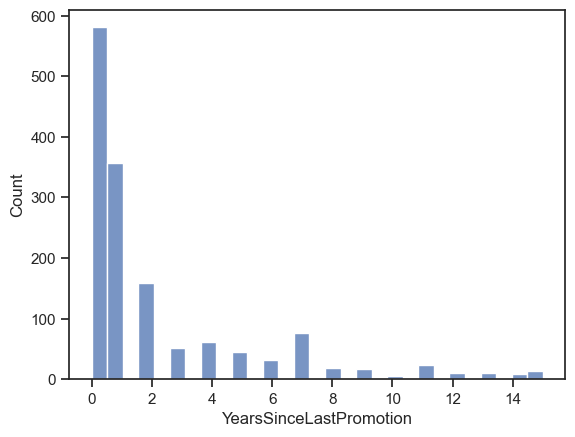

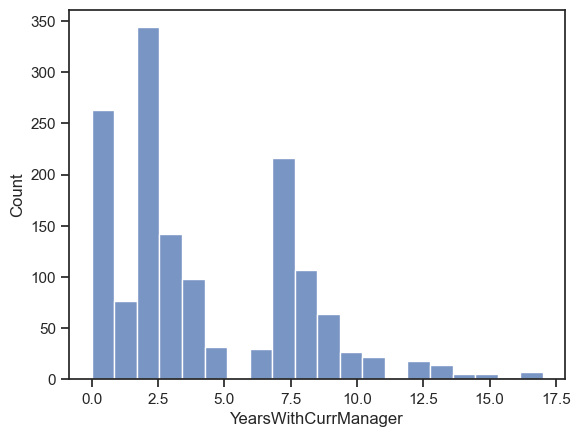

In [18]:
history_var = ['TotalWorkingYears', 'TrainingTimesLastYear', 'NumCompaniesWorked',
 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
for var in history_var:
    sns.histplot(data = emp_df, x = var)
    plt.show()

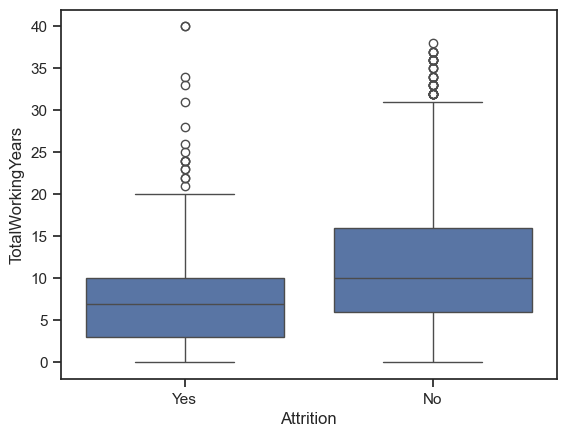

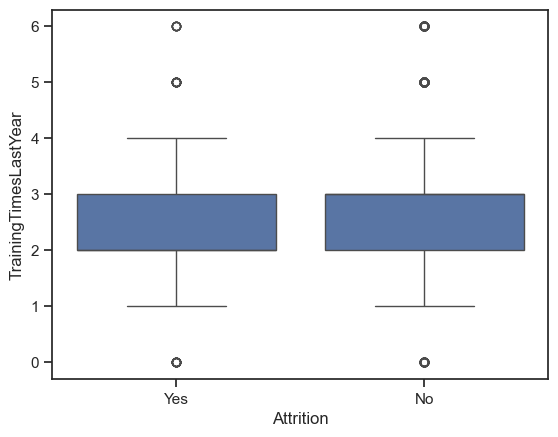

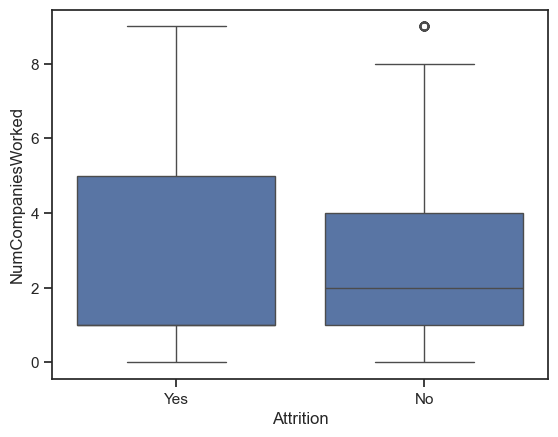

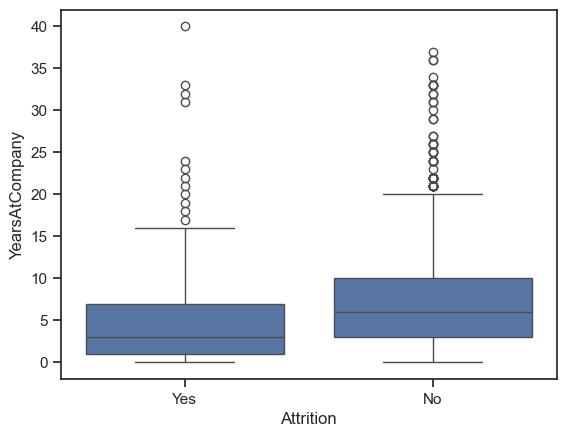

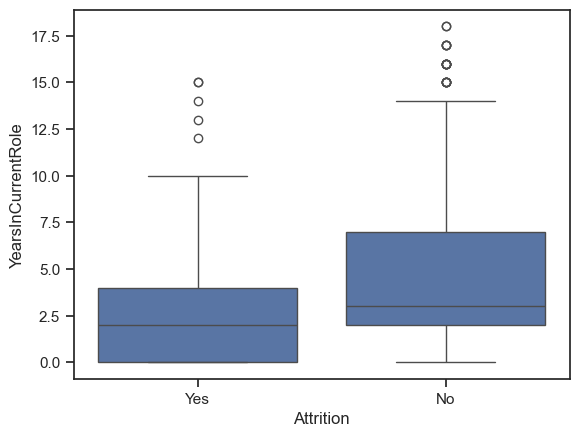

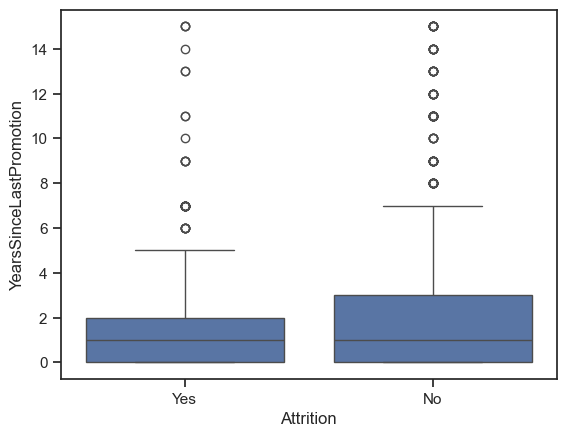

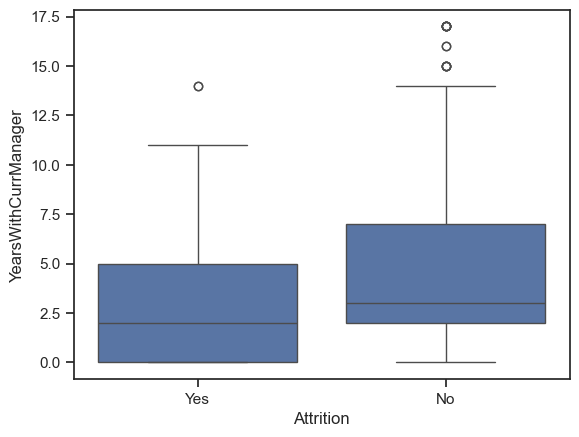

In [19]:
for var in history_var:
    sns.boxplot(data = attrition, x = 'Attrition', y = var)
    plt.show()

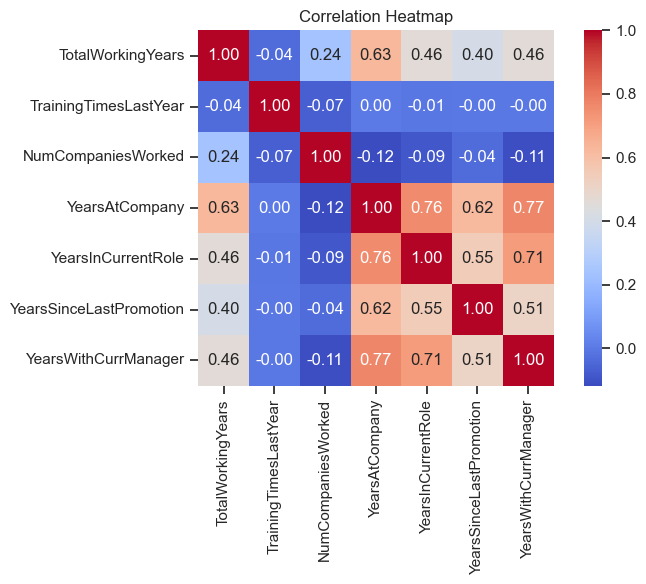

In [20]:
# Plot the correlation matrix of history variables
hist_corr = attrition[history_var].corr()
# plot
plt.figure(figsize=(8, 6))
sns.heatmap(hist_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(attrition[history_var])
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [22]:
vif

,Variable,VIF
0,const,9.614324
1,TotalWorkingYears,1.979328
2,TrainingTimesLastYear,1.005278
3,NumCompaniesWorked,1.217294
4,YearsAtCompany,4.494398
5,YearsInCurrentRole,2.668855
6,YearsSinceLastPromotion,1.663605
7,YearsWithCurrManager,2.724068


I checked their collinearity using correlation and VIF. Although VIF values are not very alarming, I still decide to drop 'YearsAtCompany', as it is highly correlated with two other variables 'YearsInCurrentRole' and 'YearsWithCurrManager'.

In [23]:
attrition.drop('YearsAtCompany', axis = 1, inplace = True)

11. I checked for missing values and did not find any.  Please refer to the slides "Data Preparation - Feature Engineering" for detailed information about what we need to do to prepare features for our model building.<br> 
Let's assume we do not need generate new features.

In [24]:
attrition.isna().sum()
# No missing values

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

12. Finally, we will code the categorical variables. Some variables have already been ordinally coded, such as Education and the satisfaction variables.<br>
We have the following categorical variables to be coded.<br>
['BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'OverTime']<br>
We will use dummy variable (one-hot coding) for them.<br>
Let's prepare our X and y: target variable 'Attrition' and the rest are predictor variables. Code the dummy variables for X.

In [25]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [26]:
# Convert attrition to binary
attrition['Attrition'] = attrition['Attrition'].map({'Yes': 1, 'No': 0})

# Prepare x and y
y = attrition['Attrition']
X = attrition.drop('Attrition', axis=1)

# Encode categorical variables
categorical = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime']

X = pd.get_dummies(X, columns=categorical, drop_first=True, dtype=int)

13. Split training and test dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

14. Use a logistic regression model to examine which variables play a significant role in employee attrition.

In [ ]:
# Logistic regression model
X_train_const = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_const).fit()

logit_model.summary()

         Current function value: 0.290794
         Iterations: 35


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1135
Method:                           MLE   Df Model:                           40
Date:                Sun, 06 Apr 2025   Pseudo R-squ.:                  0.3585
Time:                        22:35:22   Log-Likelihood:                -341.97
converged:                      False   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                 2.057e-57
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -18.1017   1.83e+04     -0.001      0.999    -3.6e+04    3.59e+04
Age                                  -0.0285      0.015     -1.899      0.058      -0.058       0.001
DistanceFromHome                      0.0447      0.012      3.654      0.000       0.021       0.069
Education                             0.0628      0.098      0.642      0.521      -0.129       0.254
EnvironmentSatisfaction              -0.3771      0.095     -3.966      0.000      -0.563      -0.191
JobInvolvement                       -0.5089      0.138     -3.676      0.000      -0.780      -0.238
JobLevel                              0.0533      0.357      0.150      0.881      -0.646       0.752
JobSatisfaction                      -0.4102      0.092     -4.478      0.000      -0.590      -0.231
MonthlyIncome                      4.971e-05   9.09e-05      0.547      0.585      -0.000       0.000
NumCompaniesWorked                    0.1846      0.043      4.292      0.000       0.100       0.269
PercentSalaryHike                    -0.0128      0.043     -0.296      0.767      -0.098       0.072
PerformanceRating                    -0.1187      0.441     -0.270      0.788      -0.982       0.745
RelationshipSatisfaction             -0.1651      0.093     -1.776      0.076      -0.347       0.017
StockOptionLevel                     -0.1999      0.170     -1.177      0.239      -0.533       0.133
TotalWorkingYears                    -0.0425      0.031     -1.361      0.174      -0.104       0.019
TrainingTimesLastYear                -0.1627      0.082     -1.993      0.046      -0.323      -0.003
WorkLifeBalance                      -0.3771      0.143     -2.630      0.009      -0.658      -0.096
YearsInCurrentRole                   -0.1344      0.048     -2.772      0.006      -0.229      -0.039
YearsSinceLastPromotion               0.2101      0.047      4.509      0.000       0.119       0.301
YearsWithCurrManager                 -0.0714      0.048     -1.476      0.140      -0.166       0.023
BusinessTravel_Travel_Frequently      1.9458      0.481      4.047      0.000       1.003       2.888
BusinessTravel_Travel_Rarely          1.0645      0.446      2.385      0.017       0.190       1.939
Department_Research & Development    18.7320   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
Department_Sales                     18.9072   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
EducationField_Life Sciences         -0.8725      0.895     -0.975      0.330      -2.626       0.881
EducationField_Marketing             -0.5916      0.952     -0.621      0.534      -2.458       1.275
EducationField_Medical               -0.8082      0.889     -0.909      0.363      -2.550       0.934
EducationField_Other                 -0.8994      0.956     -0.941      0.347      -2.772       0.973
EducationField_Technical Degree       0.0838      0.922      0.091      0.928  

Several variables are significantly associated with employee attrition. Employees who work overtime, travel frequently, or are single are more likely to leave. Certain job rRoles like Sales Representative, Laboratory Technician, and Research Scientist show significantly higher odds of attrition compared to the baseline. On the other hand, higher environment satisfaction, job satisfaction, job involvement, and work-life balance are linked to lower attrition. Additionally, more years since the last promotion and a higher number of companies worked for are associated with an increased likelihood of leaving, suggesting that limited growth opportunities may increase the likelihoof of attrition.

15. Build two decision tree models (by varying the tree parameters) to make predictions. Evaluate your results using performance metrics we have learned.

In [ ]:
# Model 1
dec_tree1 = DecisionTreeClassifier(random_state=42)
dec_tree1.fit(X_train, y_train)
y_pred1 = dec_tree1.predict(X_test)

print("Decision Tree Model 1 Results:")
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# Model 2
dec_tree2 = DecisionTreeClassifier(max_depth=5, random_state=42)
dec_tree2.fit(X_train, y_train)
y_pred2 = dec_tree2.predict(X_test)

print("Decision Tree Model 2 Results:")
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))


Decision Tree Model 1 Results:
[[223  32]
 [ 27  12]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       255
           1       0.27      0.31      0.29        39

    accuracy                           0.80       294
   macro avg       0.58      0.59      0.59       294
weighted avg       0.81      0.80      0.80       294

Decision Tree Model 2 Results:
[[235  20]
 [ 31   8]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       255
           1       0.29      0.21      0.24        39

    accuracy                           0.83       294
   macro avg       0.58      0.56      0.57       294
weighted avg       0.80      0.83      0.81       294



Model 1 (using default parameters) has an overall accuracy of 80% with a better balance between precision and recall for both classes. Model 2 (with a max depth of 5) slightly improved overall accuracy to 83%, but performed worse in identifying employees who left the company, with a recall of just 21% for the attrition class. While both models perform well in predicting who stayed, they struggle to correctly identify those likely to leave, which is the key challenge in imbalanced classification problems.